# Working with Data APIs

**Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [212]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [213]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [214]:
print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1486434821000,"url":"http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.4","count":191},"features":[{"type":"Feature","properties":{"mag":2.6,"place":"62km W of Willow, Alaska","time":1486431370864,"updated":1486432616968,"tz":-540,"url":"http://earthquake.usgs.gov/earthquakes/eventpage/ak15219970","detail":"http://earthquake.usgs.gov/earthquake


In [205]:
endpoint_url="http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1_week.geojson"
response=requests.get(endpoint_url)
results=response.text
print(type(results))


<class 'str'>


In [215]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [216]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'properties': {'updated': 1486432616968, 'ids': ',ak15219970,', 'tsunami': 0, 'url': 'http://earthquake.usgs.gov/earthquakes/eventpage/ak15219970', 'place': '62km W of Willow, Alaska', 'dmin': None, 'felt': None, 'types': ',geoserve,origin,', 'net': 'ak', 'code': '15219970', 'magType': 'ml', 'detail': 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak15219970.geojson', 'alert': None, 'nst': None, 'title': 'M 2.6 - 62km W of Willow, Alaska', 'sources': ',ak,', 'tz': -540, 'mmi': None, 'gap': None, 'cdi': None, 'type': 'earthquake', 'rms': 0.6, 'status': 'automatic', 'time': 1486431370864, 'mag': 2.6, 'sig': 104}, 'id': 'ak15219970', 'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-151.2174, 61.7321, 67.1]}}


In [185]:
data.keys()

dict_keys(['results', 'status'])

In [208]:
data

{'bbox': [-178.6514, -57.0138, -0.54, 179.6155, 76.2096, 581.6],
 'features': [{'geometry': {'coordinates': [-151.2174, 61.7321, 67.1],
    'type': 'Point'},
   'id': 'ak15219970',
   'properties': {'alert': None,
    'cdi': None,
    'code': '15219970',
    'detail': 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak15219970.geojson',
    'dmin': None,
    'felt': None,
    'gap': None,
    'ids': ',ak15219970,',
    'mag': 2.6,
    'magType': 'ml',
    'mmi': None,
    'net': 'ak',
    'nst': None,
    'place': '62km W of Willow, Alaska',
    'rms': 0.6,
    'sig': 104,
    'sources': ',ak,',
    'status': 'automatic',
    'time': 1486431370864,
    'title': 'M 2.6 - 62km W of Willow, Alaska',
    'tsunami': 0,
    'type': 'earthquake',
    'types': ',geoserve,origin,',
    'tz': -540,
    'updated': 1486432616968,
    'url': 'http://earthquake.usgs.gov/earthquakes/eventpage/ak15219970'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [176.2518, -18.9569, 10], 'type':

In [217]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-151.2174, 61.7321, 67.1], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '15219970',
 'detail': 'http://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak15219970.geojson',
 'dmin': None,
 'felt': None,
 'gap': None,
 'ids': ',ak15219970,',
 'mag': 2.6,
 'magType': 'ml',
 'mmi': None,
 'net': 'ak',
 'nst': None,
 'place': '62km W of Willow, Alaska',
 'rms': 0.6,
 'sig': 104,
 'sources': ',ak,',
 'status': 'automatic',
 'time': 1486431370864,
 'title': 'M 2.6 - 62km W of Willow, Alaska',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,',
 'tz': -540,
 'updated': 1486432616968,
 'url': 'http://earthquake.usgs.gov/earthquakes/eventpage/ak15219970'}


In [221]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 2.6 - 62km W of Willow, Alaska
M 5.1 - 177km SW of Nadi, Fiji
M 4.5 - 183km SSW of Nadi, Fiji
M 2.6 - 9km ESE of Hidden Valley Lake, California
M 2.5 - 43km NE of Covelo, California
M 5.6 - Pacific-Antarctic Ridge
M 2.7 - 9km ENE of Redwood Valley, California
M 5.6 - 33km NW of Pipalkoti, India
M 5.0 - 145km ENE of Opotiki, New Zealand
M 3.2 - 14km E of Angwin, California
M 3.2 - 14km E of Angwin, California
M 4.6 - 24km E of Artyom, Azerbaijan
M 5.4 - 17km ENE of Colombia, Colombia
M 4.6 - 23km ENE of Gumdag, Turkmenistan
M 4.8 - 28km NW of Lolak, Indonesia
M 5.0 - 259km ENE of Hachijo-jima, Japan
M 4.9 - 17km WNW of Behram, Turkey
M 3.1 - 8km ENE of Edmond, Oklahoma
M 5.4 - 22km WNW of Behram, Turkey
M 3.0 - 75km WNW of Kalaoa, Hawaii
M 2.5 - 78km WSW of Talkeetna, Alaska
M 4.8 - 146km ESE of Iquique, Chile
M 3.4 - 54km ESE of Maneadero, B.C., MX
M 2.7 - 34km ESE of Vieques, Puerto Rico
M 4.0 - 11km SE of Oarai, Japan
M 4.5 - 32km SW of Luring, China
M 2.6 - 37km ESE of Sutton-Alpi

In [222]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

191


In [17]:
# print the first few lines of data

print(df.head())

   depth  magnitude
0   87.5        2.5
1   97.6        2.5
2   75.0        3.6
3   10.0        4.9
4  170.0        2.9


In [18]:
# print some descriptive statistics

print(df.describe())

            depth   magnitude
count  226.000000  226.000000
mean    59.172965    3.778053
std     85.186612    0.969785
min     -0.280000    2.460000
25%     10.000000    2.802500
50%     31.230000    3.650000
75%     77.202500    4.675000
max    558.050000    5.900000


In [200]:
df.sort['magnitude']

TypeError: 'method' object is not subscriptable

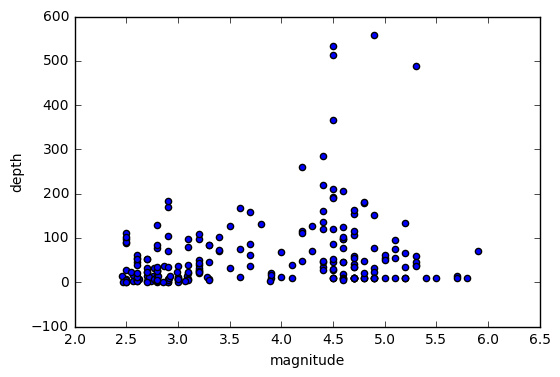

In [24]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [25]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [95]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   depth  magnitude
0   87.5        2.5
1   97.6        2.5
2   75.0        3.6
3   10.0        4.9
4  170.0        2.9


In [93]:
new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.describe())

            depth   magnitude
count  226.000000  226.000000
mean    59.172965    3.778053
std     85.186612    0.969785
min     -0.280000    2.460000
25%     10.000000    2.802500
50%     31.230000    3.650000
75%     77.202500    4.675000
max    558.050000    5.900000


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [27]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [28]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [29]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'results': [{'place_id': 'ChIJ4TWVhLhEQogRoRWbSlkOZZY', 'types': ['establishment', 'library', 'point_of_interest'], 'formatted_address': '401 Hilltop Ave, Lexington, KY 40506, USA', 'geometry': {'location_type': 'APPROXIMATE', 'location': {'lng': -84.5017179, 'lat': 38.0328721}, 'viewport': {'northeast': {'lng': -84.50036891970849, 'lat': 38.0342210802915}, 'southwest': {'lng': -84.5030668802915, 'lat': 38.0315231197085}}}, 'address_components': [{'short_name': '401', 'types': ['street_number'], 'long_name': '401'}, {'short_name': 'Hilltop Ave', 'types': ['route'], 'long_name': 'Hilltop Avenue'}, {'short_name': 'Lexington', 'types': ['locality', 'political'], 'long_name': 'Lexington'}, {'short_name': 'Fayette County', 'types': ['administrative_area_level_2', 'political'], 'long_name': 'Fayette County'}, {'short_name': 'KY', 'types': ['administrative_area_level_1', 'political'], 'long_name': 'Kentucky'}, {'short_name': 'US', 'types': ['country', 'political'], 'long_name': 'United State

In [30]:
# print it more nicely

pp.pprint(data)

{'results': [{'address_components': [{'long_name': '401',
                                      'short_name': '401',
                                      'types': ['street_number']},
                                     {'long_name': 'Hilltop Avenue',
                                      'short_name': 'Hilltop Ave',
                                      'types': ['route']},
                                     {'long_name': 'Lexington',
                                      'short_name': 'Lexington',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Fayette County',
                                      'short_name': 'Fayette County',
                                      'types': ['administrative_area_level_2',
                                                'political']},
                                     {'long_name': 'Kentucky',
                                      'short_name': 'KY',
               

In [31]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

38.0328721 -84.5017179


### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

In [98]:
endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'Fuzhou'} #my hometown in china 

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=Fuzhou


# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [99]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [100]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [101]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


In [104]:
print("whatever i just tested")

whatever i just tested


### Making a simple data request

In [42]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

Game day for @KentuckyWBB vs. No. 4/6 South Carolina. Got your blue picked out? #OneMemorial https://t.co/khkQZaV1JY


In [36]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Feb 02 14:08:25 +0000 2017',
 'entities': {'hashtags': [{'indices': [80, 92], 'text': 'OneMemorial'}],
              'media': [{'display_url': 'pic.twitter.com/khkQZaV1JY',
                         'expanded_url': 'https://twitter.com/UKAthletics/status/827156722359926785/photo/1',
                         'id': 827156644287090688,
                         'id_str': '827156644287090688',
                         'indices': [93, 116],
                         'media_url': 'http://pbs.twimg.com/media/C3qmleRWEAAGDh2.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/C3qmleRWEAAGDh2.jpg',
                         'sizes': {'large': {'h': 1024,
                                             'resize': 'fit',
                                             'w': 2048},
                                   'medium': {'h': 600,
                                              'resize': 'fit',
                    

### Other API endpoints allow different types of searches

In [117]:
# search for public tweets about #bart
endpoint = 'search/tweets'
params = {
    'q': '#superbowl', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @gagamonster96: P!nk took to Instagram to praise Lady Gaga's #SuperBowl Halftime Show https://t.co/bzfkucFKFw

RT @gagamonster96: Lady Gaga's #SuperBowl Halftime was met with praise, love and respect, rocketed her sales and went down in history as on…

RT @GigiTracyXO: When libs get it wrong and have to delete tweets. 🤣

#NotMySuperBowlChamps 
"Election Night All Over Again"
#SuperBowl 
To…

RT @honeysiota: UCANTFIXSTUPID Pure ignorance!  winning the #SuperBowl being attributed to white supremacy! https://t.co/fO8knqHTWY https:/…

RT @followAdamA: FnA Podcast: @mattmoneysmith on the #Superbowl &amp; if Tom Brady is the GOAT and if @terrellowens should be in the HOF
https:…



In [131]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hello', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@John_Kim_LANG Hello John ! How are you ?

Chapter 1-3 ✔ compilation of Manuscript CD✔ endorsement letter✔  thesis fee✔ Defense na lang, Hello thesis 2 na!

Ilang araw na lang, hello beach!!! 😉

@jacklet2808 be akala ko kaseh pang messenger ka nalang tinry ko lang. Hello 😂😂😂

@John_Kim_LANG Hello you good?



In [133]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

couldn't be happier about becoming the sweetheart to all of my best… https://t.co/zaWJbspGuL

Wishing the happiest of birthdays to the first person to welcome me… https://t.co/DAemQbps9K

I just finished walking 2.26 miles in 39m:57s with #Endomondo #endorphins https://t.co/WBNa5fsbqb

The 30-day @UofKyHeForShe challenge had begun! Learn more at our table! #HeForShe https://t.co/FI7b17V3z8



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [140]:
endpoint = 'search/tweets'
params = {
    'q': 'snapchat glasses', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Using my Snapchat glasses at Disneyland 😭

April 😌✌🏼️ @Void_April: Me w/o my glasses 😊✌🏻❤️ #marvel #marvelcomics #dc #dccomics #snap #snapchat…… https://t.co/yayjnHkRQA

Me w/o my glasses 😊✌🏻❤️ #marvel #marvelcomics #dc #dccomics #snap #snapchat #snäpchat #tumblr… https://t.co/4cmmObnIa1

Glasses And Snapchat Filters🤷🏾‍♂️ https://t.co/f7yRGdF2h6

#snapchat ! #braces #smile #80s #bighair #glasses @ Leominster, Massachusetts https://t.co/ugOZun1Ct7



In [160]:
endpoint = 'search/tweets'
params = {
    'q': 'shanghai bistro', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

I just checked in at Tokyo Shanghai Bistro with #mPLUSPlaces Download today!  https://t.co/sviBeqJYHI

I'm at Shanghai Bistro in Lexington, KY https://t.co/3NTuVzRaSR

Disciples Escoffier epicurean dinner in Shanghai at le bouchon French bistro https://t.co/6xCUAfVBeK



### Bonus: Streaming live tweets in real time 

In [166]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Tue Feb 07 02:14:50 +0000 2017
North Carolina, USA, United States
Just nominated @TimElliottLive for @CMAwards #MaleCountryArtist click link and go nominate!! #boom #whatsnottolove https://t.co/M6CXZI6u72

Tue Feb 07 02:14:50 +0000 2017
Carmel, IN, United States
iconic https://t.co/7ErTCU2zzP

Tue Feb 07 02:14:50 +0000 2017
Dom Eliseu, Brasil, Brasil
I'm at Labclin - Laboratório De Análises Clínicas in Dom Eliseu, para w/ @marcielsouza777 @dayane777 https://t.co/OHVlOxTWv6

Tue Feb 07 02:14:50 +0000 2017
Delaware, USA, United States
Zion the realist on my team, should've known ❤️😓

Tue Feb 07 02:14:50 +0000 2017
Maceió, Brasil, Brasil
@taylorswift13 @katyperry oi façam as pazes amo vcs

Tue Feb 07 02:14:50 +0000 2017
Soquel, CA, United States
Sometimes I really miss my long hair but most of the time I really don't

Tue Feb 07 02:14:50 +0000 2017
Guasave, Sinaloa, México
Que chinga la uni  😞

Tue Feb 07 02:14:50 +0000 2017
Bloomingdale, FL, United States
Cutie :) https://t.co/s9I5fiXFBt

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [226]:
endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

data = json.loads(results)

e_q = data['features']

d = {'magnitude': [q['properties']['mag'] for q in e_q],
     'depth': [q['geometry']['coordinates'][2] for q in e_q]}

df = pd.DataFrame.from_dict(d)



# what is the data type of the results?
print(type(results))

<class 'str'>


In [197]:
pp.pprint(earthquakes['geometry'])
pp.pprint(earthquakes['properties'])

KeyError: 'geometry'

In [193]:
d = {'magnitude': [q['properties']['mag'] for q in earthquakes],
     'depth': [q['geometry']['coordinates'][2] for q in earthquakes]}

df = pd.DataFrame.from_dict(d)

TypeError: string indices must be integers

In [194]:
df.sort['magnitude']

TypeError: 'method' object is not subscriptable

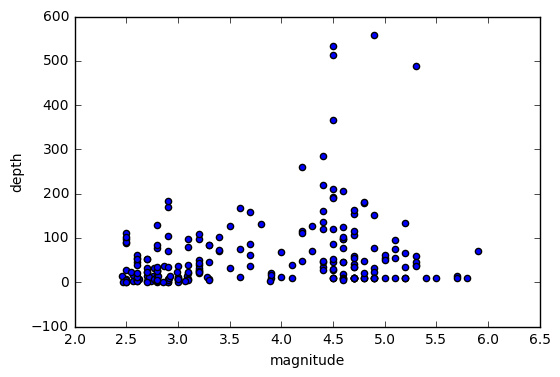

In [176]:
df.plot(x='magnitude', y='depth', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
